In [ ]:
# import clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# import other libraries
import pandas as pd
import numpy as np
from pandas import read_csv, read_excel
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
# Load the Excel file
file_path = 'EastWestAirlines.xlsx'

# Read all sheets into a dictionary of DataFrames
all_sheets_df = pd.read_excel(file_path, sheet_name=None)

# Access individual DataFrames by sheet name
description_df = all_sheets_df['Description']
Airlines = all_sheets_df['data']
Airlines


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [ ]:
Airlines.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [ ]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
Airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
Airlines.duplicated().sum()

0

In [ ]:
Airlines1 = Airlines.copy()

In [ ]:
Airlines1.drop(['ID#'], axis=1, inplace=True)

In [ ]:
Airlines1

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [ ]:
norm = MinMaxScaler()
norm_df = norm.fit_transform(Airlines1)
norm_df

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [ ]:
std= StandardScaler()
std_df= std.fit_transform(Airlines1)
std_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
Airlines1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [ ]:
categorical_columns = Airlines1.select_dtypes(include=['object']).columns  # Select columns of type 'object', which are often categorical
Airlines1[categorical_columns]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[3999 rows x 0 columns]

In [ ]:
Airlines1.corr()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108722   0.338344  -0.008804   0.035243   
Qual_miles         0.108722    1.000000   0.007931  -0.013923  -0.007779   
cc1_miles          0.338344    0.007931   1.000000  -0.068223   0.060555   
cc2_miles         -0.008804   -0.013923  -0.068223   1.000000  -0.006166   
cc3_miles          0.035243   -0.007779   0.060555  -0.006166   1.000000   
Bonus_miles        0.403487    0.031021   0.825200  -0.003969   0.204134   
Bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
Flight_miles_12mo  0.217551    0.126774   0.037370   0.010598  -0.001777   
Flight_trans_12    0.255700    0.144004   0.041333   0.028284  -0.001117   
Days_since_enroll  0.263129    0.017312   0.230849  -0.005807   0.010832   
Award?             0.178494    0.095256   0.335457   0.005332   0.023484   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403487     0.324935           0.217551   
Qual_miles            0.031021     0.050725           0.126774   
cc1_miles             0.825200     0.608943           0.037370   
cc2_miles            -0.003969     0.064399           0.010598   
cc3_miles             0.204134     0.097313          -0.001777   
Bonus_miles           1.000000     0.603180           0.183536   
Bonus_trans           0.603180     1.000000           0.377216   
Flight_miles_12mo     0.183536     0.377216           1.000000   
Flight_trans_12       0.185261     0.432364           0.869193   
Days_since_enroll     0.210397     0.161262           0.037271   
Award?                0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

In [ ]:
lines = pd.DataFrame(Airlines1)
correlation_matrix = lines.corr()
correlation_matrix

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Balance            1.000000    0.108722   0.338344  -0.008804   0.035243   
Qual_miles         0.108722    1.000000   0.007931  -0.013923  -0.007779   
cc1_miles          0.338344    0.007931   1.000000  -0.068223   0.060555   
cc2_miles         -0.008804   -0.013923  -0.068223   1.000000  -0.006166   
cc3_miles          0.035243   -0.007779   0.060555  -0.006166   1.000000   
Bonus_miles        0.403487    0.031021   0.825200  -0.003969   0.204134   
Bonus_trans        0.324935    0.050725   0.608943   0.064399   0.097313   
Flight_miles_12mo  0.217551    0.126774   0.037370   0.010598  -0.001777   
Flight_trans_12    0.255700    0.144004   0.041333   0.028284  -0.001117   
Days_since_enroll  0.263129    0.017312   0.230849  -0.005807   0.010832   
Award?             0.178494    0.095256   0.335457   0.005332   0.023484   

                   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Balance               0.403487     0.324935           0.217551   
Qual_miles            0.031021     0.050725           0.126774   
cc1_miles             0.825200     0.608943           0.037370   
cc2_miles            -0.003969     0.064399           0.010598   
cc3_miles             0.204134     0.097313          -0.001777   
Bonus_miles           1.000000     0.603180           0.183536   
Bonus_trans           0.603180     1.000000           0.377216   
Flight_miles_12mo     0.183536     0.377216           1.000000   
Flight_trans_12       0.185261     0.432364           0.869193   
Days_since_enroll     0.210397     0.161262           0.037271   
Award?                0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

**The below steps are for the to find the bvest pair in the correlation**

In [ ]:
correlation_matrix_abs = correlation_matrix.abs()

In [ ]:
np.fill_diagonal(correlation_matrix_abs.values, 0)
best_correlation_values = correlation_matrix_abs.max().max()

In [ ]:
best_correlation_values

0.8691926811569328

In [ ]:
best_corr_indices = np.where(correlation_matrix_abs == best_correlation_values)
best_corr_pair = [(correlation_matrix.index[i], correlation_matrix.columns[j]) for i, j in zip(*best_corr_indices)]

In [ ]:
best_corr_pair

[('Flight_miles_12mo', 'Flight_trans_12'),
 ('Flight_trans_12', 'Flight_miles_12mo')]

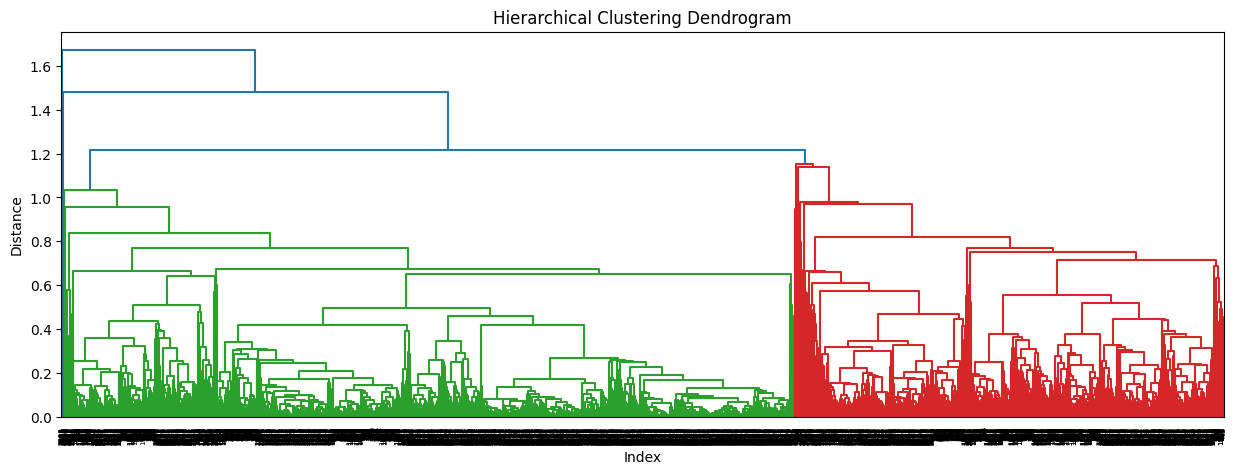

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch #fro creating dendrogram
z= linkage(norm_df,method="average",metric="euclidean")
plt.figure(figsize=(15,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
    z,
    #leaf_rotation=6., #rotates the x axis labels
    #leaf_font_rotation=15. #font size for the x axis labels
    )
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(norm_df)

DBSCAN(eps=0.8, min_samples=6)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [ ]:
cl
pd.set_option('display.max_rows', None)

In [ ]:
cl

cluster
0           0
1           0
2           0
3           0
4           1
5           0
6           0
7           1
8           1
9           1
10          0
11          1
12          0
13          0
14          0
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          0
23          0
24          0
25          0
26          0
27          0
28          1
29          1
30          0
31          0
32          0
33          0
34          0
35          1
36          1
37          0
38          1
39          1
40          0
41          1
42          1
43          1
44          0
45          1
46          0
47          1
48          1
49          0
50          0
51          0
52          1
53          1
54          0
55          0
56          0
57          1
58          0
59          1
60          0
61          0
62          0
63          0
64          0
65          1
66          0
67          0
68          1
69          1
70          0
71          0
72          0
73          0
74          0
75          0
76          0
77          0
78          1
79          1
80          1
81          0
82          0
83          0
84          0
85          1
86          1
87          0
88          0
89          1
90          1
91          0
92          1
93          1
94          1
95          0
96          0
97          0
98          0
99          1
100         1
101         1
102         0
103         1
104         0
105         1
106         1
107         1
108         1
109         1
110         0
111         1
112         0
113         1
114         1
115         0
116         0
117         1
118         1
119         1
120         0
121         1
122         1
123         1
124         0
125         1
126         1
127         1
128         1
129         1
130         1
131         1
132         1
133         1
134         1
135         1
136         0
137         1
138         1
139         0
140         0
141         0
142         0
143         0
144         0
145         1
146         0
147         1
148         0
149         0
150         1
151         1
152         0
153         0
154         1
155         0
156         0
157         1
158         1
159         0
160         0
161         1
162         1
163         1
164         1
165         0
166         0
167         1
168         1
169         1
170         1
171         0
172         1
173         1
174         0
175         1
176         1
177         1
178         1
179         1
180         0
181         1
182         0
183         1
184         0
185         0
186         1
187         0
188         0
189         0
190         1
191         1
192         1
193         0
194         1
195         0
196         1
197         0
198         1
199         1
200         1
201         1
202         0
203         1
204         0
205         0
206         1
207         1
208         1
209         0
210         1
211         0
212         0
213         1
214         0
215         0
216         0
217         0
218         1
219         0
220         1
221         1
222         1
223         0
224         0
225         0
226         1
227         1
228         0
229         0
230         1
231         1
232         0
233         1
234         1
235         1
236         0
237         1
238         1
239         0
240         0
241         1
242         0
243         0
244         1
245         1
246         0
247         1
248         1
249         0
250         0
251         0
252         0
253         1
254         1
255         0
256         0
257         1
258         0
259         1
260         0
261         0
262         0
263         0
264         1
265         1
266         0
267         0
268         1
269         1
270         1
271         1
272         1
273         0
274         0
275         1
276         0
277         1
278         0
279         1
280         0
281         1
282         0
283         1
284         1
28

In [ ]:
df1 = pd.concat([Airlines, cl], axis=1)
df1

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

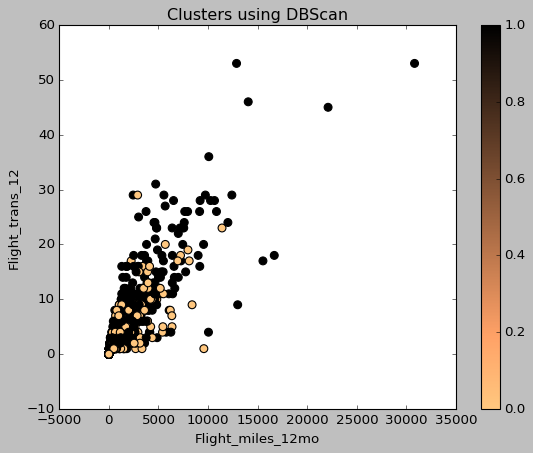

In [ ]:
df1.plot(x="Flight_miles_12mo",y ="Flight_trans_12",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using DBScan')

In [ ]:
dl = dbscan.labels_

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(norm_df, dbscan.labels_)

0.535930510919477

In [ ]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)
y_means = clf.fit_predict(norm_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
y_means

array([1, 1, 1, ..., 0, 3, 3], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

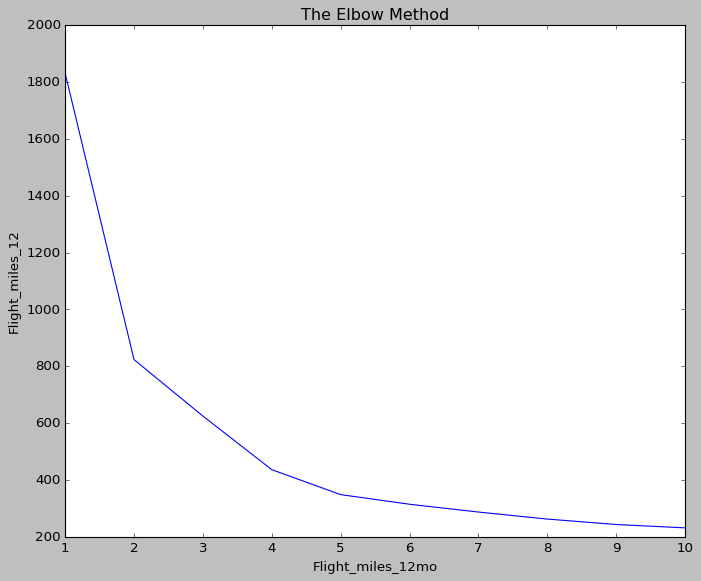

In [ ]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(norm_df)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('Flight_miles_12')
plt.xlabel('Flight_miles_12mo')
plt.show()

In [ ]:
cl1 = pd.DataFrame(y_means, columns=['cluster'])
cl1

cluster
0           1
1           1
2           1
3           1
4           0
5           1
6           4
7           2
8           0
9           0
10          1
11          0
12          1
13          1
14          1
15          0
16          0
17          2
18          0
19          0
20          0
21          2
22          1
23          1
24          1
25          1
26          1
27          1
28          0
29          2
30          4
31          1
32          4
33          1
34          1
35          0
36          2
37          1
38          0
39          2
40          1
41          0
42          2
43          0
44          4
45          2
46          1
47          2
48          0
49          1
50          1
51          1
52          0
53          2
54          1
55          1
56          4
57          2
58          4
59          0
60          4
61          1
62          1
63          1
64          1
65          0
66          1
67          4
68          0
69          0
70          1
71          4
72          4
73          1
74          4
75          4
76          1
77          4
78          0
79          0
80          2
81          1
82          1
83          1
84          1
85          0
86          2
87          4
88          1
89          2
90          2
91          1
92          0
93          2
94          0
95          1
96          1
97          4
98          1
99          0
100         0
101         2
102         1
103         2
104         1
105         0
106         2
107         2
108         0
109         0
110         4
111         2
112         4
113         2
114         2
115         4
116         1
117         2
118         0
119         2
120         1
121         0
122         0
123         0
124         4
125         0
126         0
127         0
128         2
129         0
130         2
131         2
132         2
133         2
134         0
135         2
136         4
137         0
138         2
139         1
140         1
141         1
142         1
143         4
144         4
145         2
146         1
147         0
148         4
149         1
150         0
151         0
152         4
153         1
154         0
155         4
156         4
157         0
158         0
159         1
160         4
161         0
162         2
163         0
164         0
165         1
166         1
167         0
168         0
169         0
170         0
171         1
172         0
173         2
174         4
175         0
176         2
177         2
178         2
179         2
180         1
181         0
182         1
183         2
184         4
185         4
186         0
187         1
188         4
189         1
190         0
191         0
192         0
193         1
194         2
195         1
196         0
197         4
198         2
199         0
200         0
201         2
202         1
203         0
204         1
205         1
206         0
207         2
208         0
209         1
210         0
211         1
212         1
213         0
214         1
215         4
216         1
217         1
218         0
219         4
220         0
221         0
222         2
223         1
224         4
225         1
226         2
227         0
228         1
229         4
230         0
231         0
232         1
233         2
234         2
235         2
236         1
237         2
238         0
239         1
240         4
241         2
242         4
243         4
244         0
245         0
246         1
247         2
248         0
249         1
250         1
251         1
252         4
253         0
254         2
255         4
256         1
257         2
258         1
259         0
260         1
261         1
262         1
263         1
264         2
265         0
266         1
267         1
268         0
269         0
270         0
271         0
272         0
273         1
274         1
275         2
276         1
277         0
278         1
279         0
280         1
281         0
282         1
283         2
284         0
28

In [ ]:
df2 = pd.concat([Airlines, cl1], axis=1)
df2

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

Text(0.5, 1.0, 'Clusters using K-Means')

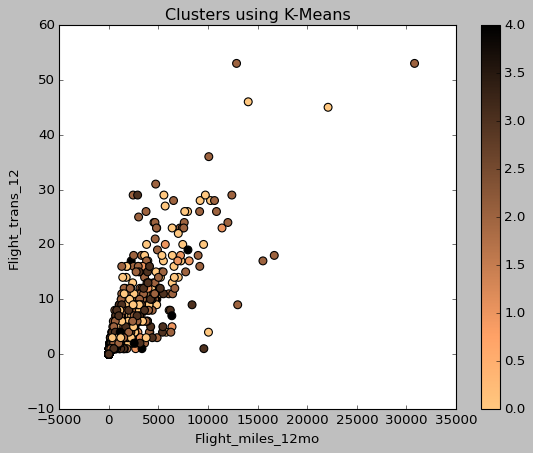

In [ ]:
df2.plot(x="Flight_miles_12mo",y ="Flight_trans_12",c=y_means ,kind="scatter",s=50 ,cmap=plt.cm.copper_r)
plt.title('Clusters using K-Means')

**No questions asked**